# Recomendation System
The basic concept of the Recommendation System this time is not based on rate or sentiment analysis of customer satisfaction, but based on a price range so that it can target customers at prices that match the situation and wishes of the user.

Why should the price? because the data we get is quite difficult to determine what parameters are suitable for the user because the goods we provide in the form of services are not films or goods used to be spent.

### Processing Data

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
data_training = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/capstone/Data_Training.xlsx')
data_training = data_training[['ID Num','Tipe Kendaraan','Jenis Kendaraan','Business','Prices/day']]

data_testing = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/capstone/Data_Test.xlsx')
data_testing = data_testing[['ID Num','Tipe Kendaraan','Jenis Kendaraan','Business','Prices/day']]

In [ ]:
def convert_prices(x):
    if x == '< 100.000':
        return 0
    if x == '100.000 - 200.000':
        return 1
    if x == '200.000 - 500.000':
        return 2
    if x == '> 500.000':
        return 3
  
data_training['Prices/day'] = data_training['Prices/day'].map(convert_prices)
data_testing['Prices/day'] = data_testing['Prices/day'].map(convert_prices)

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Create LabelEncoder instances
vehicle_encoder = LabelEncoder()
type_encoder = LabelEncoder()
business_encoder = LabelEncoder()
id_encoder = LabelEncoder()

# Fit and transform the labels
encoded_vehicle = vehicle_encoder.fit_transform(data_training[['Tipe Kendaraan']])
encoded_type = type_encoder.fit_transform(data_training[['Jenis Kendaraan']])
encoded_business = business_encoder.fit_transform(data_training[['Business']])
encoded_id = id_encoder.fit_transform(data_training[['ID Num']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

In [ ]:
data_training['Tipe Kendaraan'] = encoded_vehicle
data_training['Jenis Kendaraan'] = encoded_type
data_training['Business'] = encoded_business
data_training['ID Num'] = encoded_id
data_training

,Tipe Kendaraan,Jenis Kendaraan,Business,Prices/day,ID Num
0,0,5,1,1,31
1,0,5,0,2,5
2,1,2,0,1,202
3,0,3,0,1,12
4,0,3,2,1,33
...,...,...,...,...,...
1023,1,2,0,1,196
1024,1,0,0,1,215
1025,1,2,0,0,242
1026,0,6,2,3,108


In [ ]:
print(vehicle_encoder.classes_)
print(vehicle_encoder.transform(np.array(['Mobil','Motor'])))
# =======================================================
print(type_encoder.classes_)
print(type_encoder.transform(np.array(['bebek','hatchback','matic','mpv','sedan','suv','van'])))
# =======================================================
print(business_encoder.classes_)
print(business_encoder.transform(np.array(['Daily Activity','Liburan/Weekend','Travel'])))
# =======================================================

['Mobil' 'Motor']
[0 1]
['bebek' 'hatchback' 'matic' 'mpv' 'sedan' 'suv' 'van']
[0 1 2 3 4 5 6]
['Daily Activity' 'Liburan/Weekend' 'Travel']
[0 1 2]


In [ ]:
data_training.nunique()

Tipe Kendaraan       2
Jenis Kendaraan      7
Business             3
Prices/day           4
ID Num             257
dtype: int64

In [ ]:
LE = LabelEncoder()
for col in columns:
    data_testing[col] = LE.fit_transform(data_testing[[col]])

In [ ]:
data_testing = data_testing.sample(frac=1, ignore_index=True)
features_train, features_test = np.array(data_training.drop(['Prices/day'],axis=1)), np.array(data_testing.drop(['Prices/day'],axis=1))
reccomend_train, reccomend_test = np.array(data_training['Prices/day']), np.array(data_testing['Prices/day'])

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128,input_dim=features.shape[1], activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax'),
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               640       
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 32)                2080      
                                                                 
 dense_15 (Dense)            (None, 4)                 132       
                                                                 
Total params: 11,108
Trainable params: 11,108
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer = 'Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(features_train, reccomend_train,validation_data=(features_test, reccomend_test), epochs=200,batch_size=32, verbose=1)

Epoch 1/200
26/26 [==============================] - 1s 11ms/step - loss: 3.5904 - accuracy: 0.3406 - val_loss: 1.5313 - val_accuracy: 0.3786
Epoch 2/200
26/26 [==============================] - 0s 4ms/step - loss: 1.2564 - accuracy: 0.4453 - val_loss: 1.3320 - val_accuracy: 0.3641
Epoch 3/200
26/26 [==============================] - 0s 4ms/step - loss: 1.2055 - accuracy: 0.4599 - val_loss: 1.4149 - val_accuracy: 0.3835
Epoch 4/200
26/26 [==============================] - 0s 4ms/step - loss: 1.2273 - accuracy: 0.4732 - val_loss: 1.2286 - val_accuracy: 0.4757
Epoch 5/200
26/26 [==============================] - 0s 4ms/step - loss: 1.1502 - accuracy: 0.5036 - val_loss: 1.2002 - val_accuracy: 0.4369
Epoch 6/200
26/26 [==============================] - 0s 4ms/step - loss: 1.3181 - accuracy: 0.4380 - val_loss: 1.1693 - val_accuracy: 0.4369
Epoch 7/200
26/26 [==============================] - 0s 4ms/step - loss: 1.2022 - accuracy: 0.4732 - val_loss: 1.1527 - val_accuracy: 0.5049
Epoch 8/200


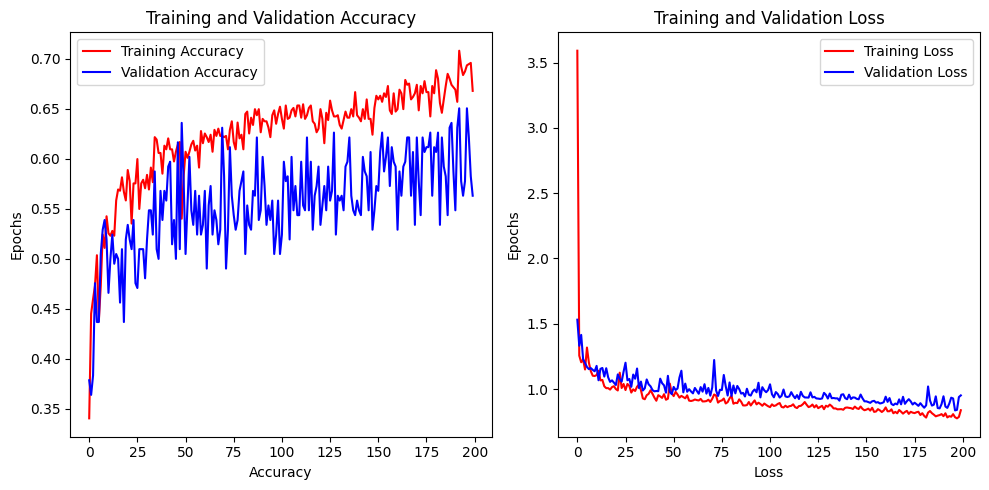

In [ ]:
# Plot the chart for accuracy and loss on both training and validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Plot Training and Validation Accuracy
axes[0].plot(epochs, acc, 'r', label='Training Accuracy')
axes[0].plot(epochs, val_acc, 'b', label='Validation Accuracy')
axes[0].set_title('Training and Validation Accuracy')
axes[0].set_xlabel('Accuracy')
axes[0].set_ylabel('Epochs')
axes[0].legend()

# Plot Training and Validation Loss
axes[1].plot(epochs, loss,  'r', label='Training Loss')
axes[1].plot(epochs, val_loss,  'b', label='Validation Loss')
axes[1].set_title('Training and Validation Loss')
axes[1].set_xlabel('Loss')
axes[1].set_ylabel('Epochs')
axes[1].legend()

plt.tight_layout()
plt.show()

# Do Experiment to Forward and Backward Propagation Features

### Looking for Batch Size

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

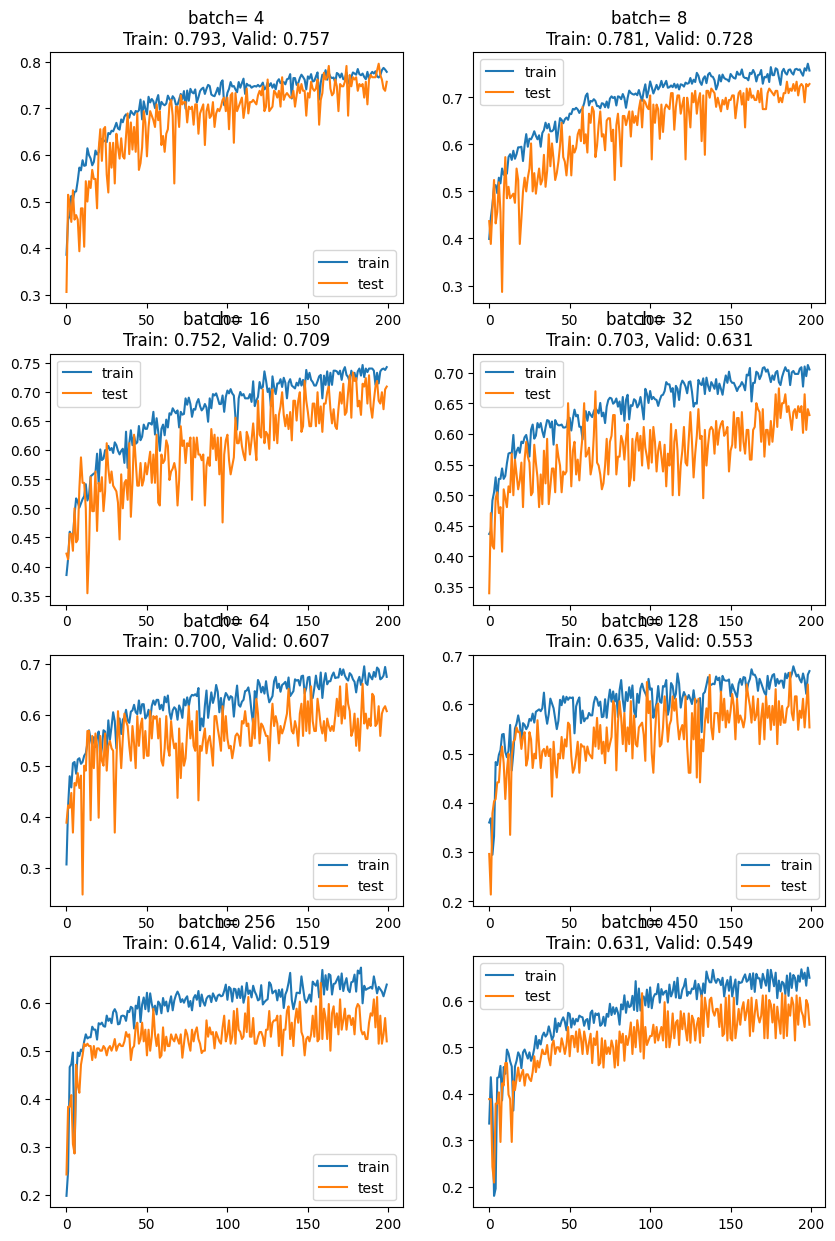

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# prepare train and test dataset
def convert_prices(x):
    if x == '< 100.000':
        return 0
    if x == '100.000 - 200.000':
        return 1
    if x == '200.000 - 500.000':
        return 2
    if x == '> 500.000':
        return 3
def prepare_data():
  data_training = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/capstone/Data_Training.xlsx')
  data_testing = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/capstone/Data_Test.xlsx')
  data_training = data_training[['ID Num','Tipe Kendaraan','Jenis Kendaraan','Business','Prices/day']]
  data_testing = data_testing[['ID Num','Tipe Kendaraan','Jenis Kendaraan','Business','Prices/day']]
  data_training['Prices/day'] = data_training['Prices/day'].map(convert_prices)
  data_testing['Prices/day'] = data_testing['Prices/day'].map(convert_prices)
  # =============================================================================================================================================================
  from sklearn.preprocessing import LabelEncoder
  # Create LabelEncoder instances
  LE = LabelEncoder()
  # =============================================================================================================================================================
  # Fit and transform the labels
  columns = ['Tipe Kendaraan','Jenis Kendaraan','Business']
  for col in columns:
    data_training[col] = LE.fit_transform(data_training[[col]])
    data_testing[col] = LE.fit_transform(data_testing[[col]])
  # =============================================================================================================================================================
  data_testing = data_testing.sample(frac=1, ignore_index=True)
  features_train, features_test = np.array(data_training.drop(['Prices/day'],axis=1)), np.array(data_testing.drop(['Prices/day'],axis=1))
  reccomend_train, reccomend_test = np.array(data_training['Prices/day']), np.array(data_testing['Prices/day'])
  return features_train, reccomend_train, features_test, reccomend_test

# fit a model and plot learning curve
def fit_model(trainX, trainy, validX, validy, n_batch):
  model = tf.keras.Sequential([
  tf.keras.layers.Dense(128,input_dim=trainX.shape[1], activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(4, activation='softmax'),
])
  # ================================================================================================================================================================
  model.compile(optimizer = 'Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  history = model.fit(trainX, trainy,validation_data=(validX, validy), epochs=200,batch_size=n_batch, verbose=0)
  # ================================================================================================================================================================
  # evaluate the model
  _, train_acc = model.evaluate(trainX, trainy, verbose=0)
  _, valid_acc = model.evaluate(validX, validy, verbose=0)
  show_percentage = 'Train: %.3f, Valid: %.3f' % (train_acc, valid_acc)
  # ================================================================================================================================================================
  # plot learning curves
  plt.plot(history.history['accuracy'], label='train')
  plt.plot(history.history['val_accuracy'], label='test')
  plt.title(f'batch= {str(n_batch)}\n{show_percentage}')
#     plt.suptitle(show_percentage, fontsize=10, y=0.98)
  plt.legend()

# ================================================================================================================================================================
# prepare dataset
# ================================================================================================================================================================
# create learning curves for different batch sizes
batch_sizes = [4, 8, 16, 32, 64, 128, 256, 450]
# ================================================================================================================================================================
plt.figure(figsize=(10, 15))
for i in range(len(batch_sizes)):
  # determine the plot number 
  plot_no = 420 + (i+1)
  plt.subplot(plot_no)
  trainX, trainy, validX, validy = prepare_data()
  # fit model and plot learning curves for a batch size
  fit_model(trainX, trainy, validX, validy, batch_sizes[i])
# show learning curves
plt.show()

We decide to choose batch_size is **8**

# Menggunakan EarlyStop dan ModelCheckpoint

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,


Epoch 1: val_accuracy improved from -inf to 0.29183, saving model to /content/drive/MyDrive/Colab Notebooks/best_model.h5

Epoch 2: val_accuracy improved from 0.29183 to 0.52529, saving model to /content/drive/MyDrive/Colab Notebooks/best_model.h5

Epoch 3: val_accuracy did not improve from 0.52529

Epoch 4: val_accuracy did not improve from 0.52529

Epoch 5: val_accuracy improved from 0.52529 to 0.54475, saving model to /content/drive/MyDrive/Colab Notebooks/best_model.h5

Epoch 6: val_accuracy did not improve from 0.54475

Epoch 7: val_accuracy improved from 0.54475 to 0.58755, saving model to /content/drive/MyDrive/Colab Notebooks/best_model.h5

Epoch 8: val_accuracy did not improve from 0.58755

Epoch 9: val_accuracy did not improve from 0.58755

Epoch 10: val_accuracy did not improve from 0.58755

Epoch 11: val_accuracy did not improve from 0.58755

Epoch 12: val_accuracy improved from 0.58755 to 0.61868, saving model to /content/drive/MyDrive/Colab Notebooks/best_model.h5

Epoch

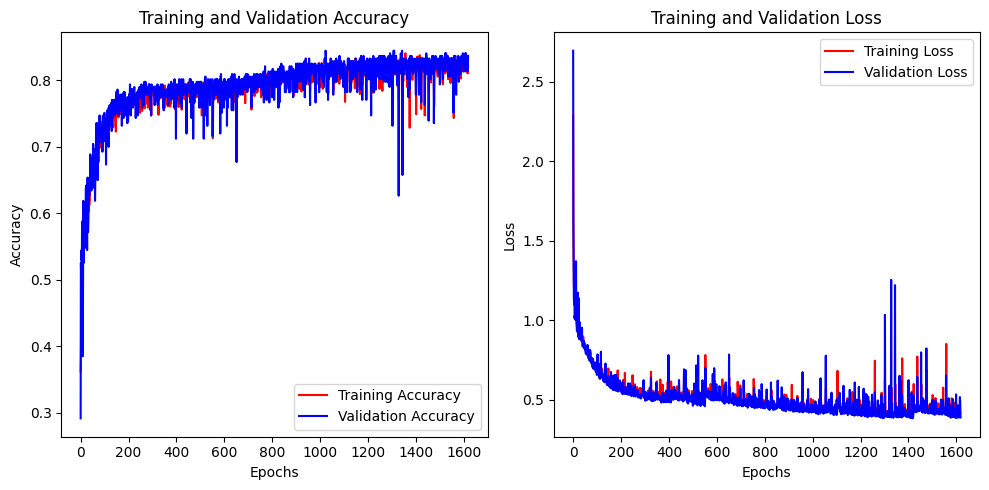

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import classification_report

# prepare train and test dataset
def convert_prices(x):
    if x == '< 100.000':
        return 0
    if x == '100.000 - 200.000':
        return 1
    if x == '200.000 - 500.000':
        return 2
    if x == '> 500.000':
        return 3
def prepare_data():
  data_training = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/capstone/Data_Training.xlsx')
  data_testing = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/capstone/Data_Test.xlsx')
  data_training = data_training[['ID Num','Tipe Kendaraan','Jenis Kendaraan','Business','Prices/day']]
  data_testing = data_testing[['ID Num','Tipe Kendaraan','Jenis Kendaraan','Business','Prices/day']]
  data_training['Prices/day'] = data_training['Prices/day'].map(convert_prices)
  data_testing['Prices/day'] = data_testing['Prices/day'].map(convert_prices)
  # =============================================================================================================================================================
  from sklearn.preprocessing import LabelEncoder
  # Create LabelEncoder instances
  LE = LabelEncoder()
  # =============================================================================================================================================================
  # Fit and transform the labels
  columns = ['Tipe Kendaraan','Jenis Kendaraan','Business']
  for col in columns:
    data_training[col] = LE.fit_transform(data_training[[col]])
    data_testing[col] = LE.fit_transform(data_testing[[col]])
  # =============================================================================================================================================================
  data_testing = data_testing.sample(frac=1, ignore_index=True)
  features_train, features_test = np.array(data_training.drop(['Prices/day'],axis=1)), np.array(data_testing.drop(['Prices/day'],axis=1))
  reccomend_train, reccomend_test = np.array(data_training['Prices/day']), np.array(data_testing['Prices/day'])
  return features_train, reccomend_train, features_test, reccomend_test


# fit a model and plot learning curve
def fit_model(trainX, trainy, validX, validy):
  model = tf.keras.Sequential([
  tf.keras.layers.Dense(128,input_dim=trainX.shape[1], activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(4, activation='softmax'),
])
  # ================================================================================================================================================================
  es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
  mc = ModelCheckpoint('/content/drive/MyDrive/Colab Notebooks/capstone/best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
  # ================================================================================================================================================================
  # from tensorflow.keras.optimizers import Adam
  model.compile(optimizer = 'Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  history = model.fit(trainX, trainy,validation_data=(validX, validy), epochs=2000,batch_size=8, verbose=0, callbacks=[es, mc])
  # ================================================================================================================================================================
  # evaluate the model
  _, train_acc = model.evaluate(trainX, trainy, verbose=0)
  _, valid_acc = model.evaluate(validX, validy, verbose=0)
  show_percentage = 'Train: %.3f, Valid: %.3f' % (train_acc, valid_acc)
  # ================================================================================================================================================================
  
  return history, show_percentage

trainX, trainy, validX, validy = prepare_data()
history, show_percentage = fit_model(trainX, trainy, validX, validy)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Plot Training and Validation Accuracy
axes[0].plot(epochs, acc, 'r', label='Training Accuracy')
axes[0].plot(epochs, val_acc, 'b', label='Validation Accuracy')
axes[0].set_title('Training and Validation Accuracy')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

# Plot Training and Validation Loss
axes[1].plot(epochs, loss,  'r', label='Training Loss')
axes[1].plot(epochs, val_loss,  'b', label='Validation Loss')
axes[1].set_title('Training and Validation Loss')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss')
axes[1].legend()

plt.tight_layout()
plt.show()

# Evaluation

In [ ]:
def convert_prices(x):
    if x == '< 100.000':
        return 0
    if x == '100.000 - 200.000':
        return 1
    if x == '200.000 - 500.000':
        return 2
    if x == '> 500.000':
        return 3

import pandas as pd
import numpy as np
data_testing = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/capstone/Data_Test.xlsx')
data_testing = data_testing[['ID Num','Tipe Kendaraan','Jenis Kendaraan','Business','Prices/day']]
data_testing['Prices/day'] = data_testing['Prices/day'].map(convert_prices)
# =============================================================================================================================================================
from sklearn.preprocessing import LabelEncoder
# Create LabelEncoder instances
LE = LabelEncoder()
# =============================================================================================================================================================
# Fit and transform the labels
columns = ['Tipe Kendaraan','Jenis Kendaraan','Business']
for col in columns:
  data_testing[col] = LE.fit_transform(data_testing[[col]])
# =============================================================================================================================================================
data_testing = data_testing.sample(frac=1, ignore_index=True)
features_test = np.array(data_testing.drop(['Prices/day'],axis=1))
reccomend_test = np.array(data_testing['Prices/day'])

import tensorflow as tf
from sklearn.metrics import classification_report

model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/capstone/best_model.h5')
X_test = features_test  # Data fitur uji
y_test = reccomend_test  # Label kelas sebenarnya

# Lakukan prediksi
y_pred = model.predict(X_test)

# konversi menjadi bentuk yang sesuai
y_pred = np.argmax(y_pred, axis=1)
# y_test = np.argmax(y_test, axis=1)

# Count the classifictaion report
class_report = classification_report(y_test,y_pred)
print(class_report)

1/9 [==>...........................] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


9/9 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       108
           1       0.82      0.68      0.75        69
           2       0.86      0.94      0.90        53
           3       1.00      0.81      0.90        27

    accuracy                           0.84       257
   macro avg       0.88      0.84      0.85       257
weighted avg       0.85      0.84      0.84       257

